In [4]:
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')

Error: Cannot re-register id: D4x4-FrozenLake-v0

In [48]:
gamma = 0.9

In [83]:
env
import numpy as np
v = np.random.random(16)
pi = np.random.random(16)

In [84]:
is_term = [False]*16
eps = [None]*itr
print(v)
itr = 100
for i in range(0,itr):
    v_new = np.random.random(16)
    for s in range(0, env.nS):
        if not is_term[s]:
            opt_v = 0 
            for a in range(0, env.nA):
                temp_v = 0
                for t in env.P[s][a]:
                    is_term[t[1]] = t[3]
                    temp_v = temp_v + t[0]*(t[2] + gamma*v[t[1]])
                if temp_v >= opt_v:
                    opt_v = temp_v
                    pi[s] = a
            v_new[s] = opt_v
        else:
            v_new[s] = 0
            pi[s] = None
    eps[i] = np.linalg.norm(v - v_new)
 #   print(eps[i])
    v = v_new

[0.11695012 0.90361523 0.43238675 0.92237265 0.20042648 0.63968399
 0.54799075 0.10066431 0.05090957 0.00331089 0.0349643  0.15207554
 0.73711333 0.45777829 0.3336381  0.49220488]


In [85]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 4):
        for i in range(0, 4):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

Value Function [0.06889157 0.06141514 0.07441017 0.05580778 0.09185515 0.
 0.11220843 0.         0.14543685 0.24749729 0.29961783 0.
 0.         0.37993614 0.63902027 0.        ]
Policy [ 0.  3.  0.  3.  0. nan  2. nan  3.  1.  0. nan nan  2.  1. nan]


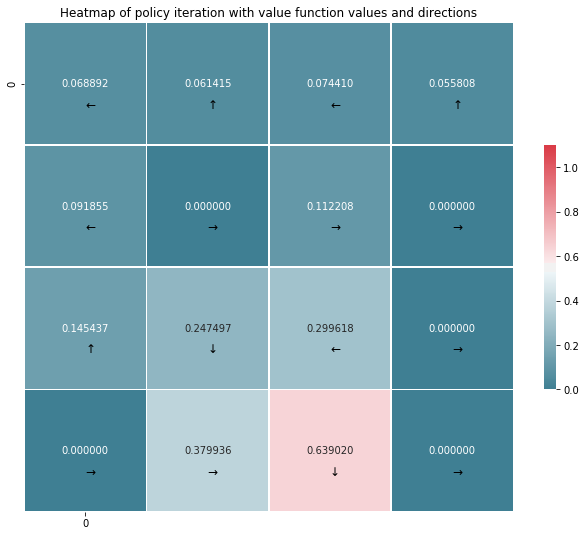

In [86]:
fancy_visual(v,pi)

In [87]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'L2 norm of change in value function')

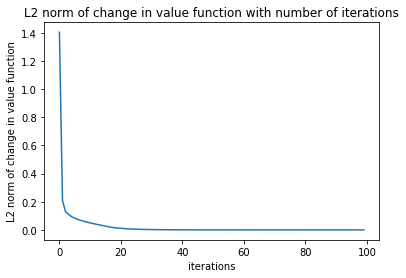

In [98]:
plt.plot(eps)
plt.title("L2 norm of change in value function with number of iterations")
plt.xlabel('iterations')
plt.ylabel("L2 norm of change in value function")

In [76]:
def get_q_func(env, v):
    q = np.zeros([env.nS, env.nA])
    for s in range(0, env.nS):
        for a in range(0, env.nA):
            for t in env.P[s][a]:
                q[s][a] = q[s][a] + t[0]*(t[2] + gamma*v[t[1]])
    return q

In [91]:
print(F'optimal q function: {get_q_func(env,v)}')

optimal q function: [[0.06889149 0.06664856 0.06664856 0.05975949]
 [0.03909201 0.04299052 0.04074759 0.06141507]
 [0.07441012 0.0688294  0.07272791 0.05748993]
 [0.03906539 0.03906539 0.03348467 0.05580772]
 [0.09185507 0.0711876  0.06429853 0.04822402]
 [0.         0.         0.         0.        ]
 [0.1122084  0.08988535 0.1122084  0.02232305]
 [0.         0.         0.         0.        ]
 [0.0711876  0.11788024 0.10180573 0.14543678]
 [0.1576119  0.24749724 0.20386619 0.1335164 ]
 [0.2996178  0.26595527 0.22536861 0.10791171]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18823003 0.30568692 0.37993611 0.26595527]
 [0.39557227 0.63902026 0.61492476 0.53719952]
 [0.         0.         0.         0.        ]]


In [101]:
print(F'optimal value function(nan represents terminal states): {pi}')

optimal value function(nan represents terminal states): [ 0.  3.  0.  3.  0. nan  2. nan  3.  1.  0. nan nan  2.  1. nan]
